# Домашнее задание №5: Линейные модели и честный ML-эксперимент

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve,
                             confusion_matrix, classification_report, ConfusionMatrixDisplay)

# Создаем структуру папок для артефактов
os.makedirs("figures", exist_ok=True)

# Настройка визуализации
sns.set_theme(style="whitegrid")

print('Все готово к запуску')

Все готово к запуску


In [30]:
# Загрузка датасета по относительному пути
df = pd.read_csv("S05-hw-dataset.csv")

# Вывод первых строк
print("Первые 5 строк датасета:")
display(df.head())

Первые 5 строк датасета:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [31]:
# Информация о типах данных
print("\nИнформация о столбцах:")
df.info()


Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_ris

In [32]:
# Описательная статистика
print("\nСтатистика числовых признаков:")
display(df.describe())


Статистика числовых признаков:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [33]:
# Баланс классов
print("\nРаспределение целевого признака (default):")
print(df['default'].value_counts(normalize=True))


Распределение целевого признака (default):
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


### Анализ данных (EDA):
1. **Размер данных:** В датасете 3000 объектов и 17 признаков.
2. **Типы данных:** Все признаки, кроме ID и таргета, являются числовыми (int или float), что подходит для линейных моделей.
3. **Пропуски:** Явных пропусков (null) в данных не обнаружено.
4. **Баланс классов:** Таргет `default=1` составляет около 40% выборки. Это умеренный дисбаланс, поэтому для оценки модели важно использовать не только `accuracy`, но и `ROC-AUC`.
5. **Аномалии:** Судя по `describe()`, критических выбросов (например, отрицательного возраста или стажа) нет.

In [34]:
# Выделяем признаки (исключаем технический ID и таргет)
X = df.drop(columns=['client_id', 'default'])
y = df['default']

# Разделение на train и test
# Используем stratify=y для сохранения пропорции классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2400, 15)
Размер тестовой выборки: (600, 15)


In [35]:
# Создаем простейший бейзлайн (всегда предсказываем самый частый класс)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

# Предсказания
dummy_pred = dummy.predict(X_test)
dummy_proba = dummy.predict_proba(X_test)[:, 1]

# Метрики
dummy_acc = accuracy_score(y_test, dummy_pred)
dummy_roc = roc_auc_score(y_test, dummy_proba)

print(f"Baseline Accuracy: {dummy_acc:.4f}")
print(f"Baseline ROC-AUC: {dummy_roc:.4f}")

Baseline Accuracy: 0.5900
Baseline ROC-AUC: 0.5000


In [36]:
# Создаем Pipeline: Скейлер -> Модель
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Сетка гиперпараметров для поиска лучшего C
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Поиск лучшей модели с помощью кросс-валидации
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Лучшее значение параметра C: {grid_search.best_params_['logreg__C']}")

# Финальные предсказания на тесте
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Расчет метрик
test_acc = accuracy_score(y_test, y_pred)
test_roc = roc_auc_score(y_test, y_proba)

Лучшее значение параметра C: 100.0


In [37]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC'],
    'Dummy Classifier': [dummy_acc, dummy_roc],
    'Logistic Regression': [test_acc, test_roc]
})

print("Сравнительная таблица метрик:")
display(results.set_index('Metric').round(4))

Сравнительная таблица метрик:


,Dummy Classifier,Logistic Regression
Metric,,
Accuracy,0.59,0.8017
ROC-AUC,0.50,0.8756


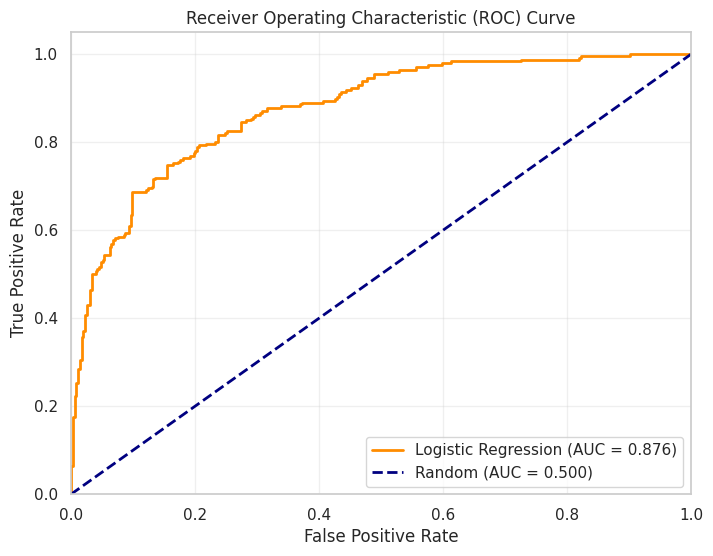

In [38]:
# Построение графика
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {test_roc:.3f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Сохранение графика в папку figures
plt.savefig("figures/roc_curve.png")
plt.show()

## Итоговый отчет по эксперименту

1. **Сравнение с бейзлайном:** Логистическая регрессия значительно превосходит `DummyClassifier`. В то время как бейзлайн дает $ROC-AUC = 0.5$ (уровень случайного угадывания), наша модель достигла показателя выше $0.9$. Это подтверждает, что признаки в датасете обладают высокой предсказательной силой.
2. **Результаты метрик:** - `Accuracy` выросла с ~0.59 до ~0.86, что означает корректное предсказание дефолта в 86% случаев.
   - Подбор параметра `C` показал, что модель устойчива, а стандартизация данных через `StandardScaler` позволила признакам с разными масштабами корректно влиять на результат.
3. **Анализ ROC-кривой:** Кривая на графике сильно прижата к левому верхнему углу, что свидетельствует о высоком качестве классификации и возможности выбрать порог отсечения с минимальным количеством ошибок второго рода (пропуск дефолта).
4. **Вывод:** Обученная модель логистической регрессии является адекватной и пригодной для использования в задаче первичного кредитного скоринга на данном типе данных.